# Analysis notebook: `alpha_signal_onspill-LH_an`  

## Define analysis name

In [1]:
ana_label = "alpha_signal_onspill-LH_an"

## Preamble

In [2]:
from preamble import *

## Load data

In [3]:
!ls ../../output/results/alpha_signal_onspill-LH_an

alpha_signal_onspill-LH_an.log	 cut_flow.csv	 hists.h5
alpha_signal_onspill-LH_an.yaml  efficiency.csv  results.pkl


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/alpha_signal_onspill-LH_an


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/alpha_signal_onspill-LH_an/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/alpha_signal_onspill-LH_an/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/alpha_signal_onspill-LH_an/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/alpha_signal_onspill-LH_an/efficiency.csv
[Load] ⚠️ File not found: ../../output/results/alpha_signal_onspill-LH_an/events.parquet
[Load] ⚠️ File not found: ../../output/results/alpha_signal_onspill-LH_an/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,1479285,100.000000,100.000000,No selection applied
1,is_reco_electron,1475995,99.777595,99.777595,Electron track fits
2,has_trk_front,1450562,98.058319,98.276891,Tracks intersect tracker entrance
3,good_trkqual,785562,53.104169,54.155700,Track fit quality > 0.8
4,within_t0,567817,38.384557,72.281628,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,567812,38.384219,99.999119,Downstream tracks (p_z > 0 at tracker entrance)
6,has_hits,563443,38.088874,99.230555,>20 active tracker hits
7,within_d0,561129,37.932447,99.589311,Distance of closest approach (d_0 < 100 mm)
8,within_pitch_angle,523520,35.390070,93.297620,Extrapolated pitch angle (0.557735 < tan(theta...
9,within_lhr_max,522878,35.346671,99.877369,Loop helix maximum radius (450 < R_max < 680 mm)


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/alpha_signal_onspill-LH_an/h1o_1x3_mom_windows.png


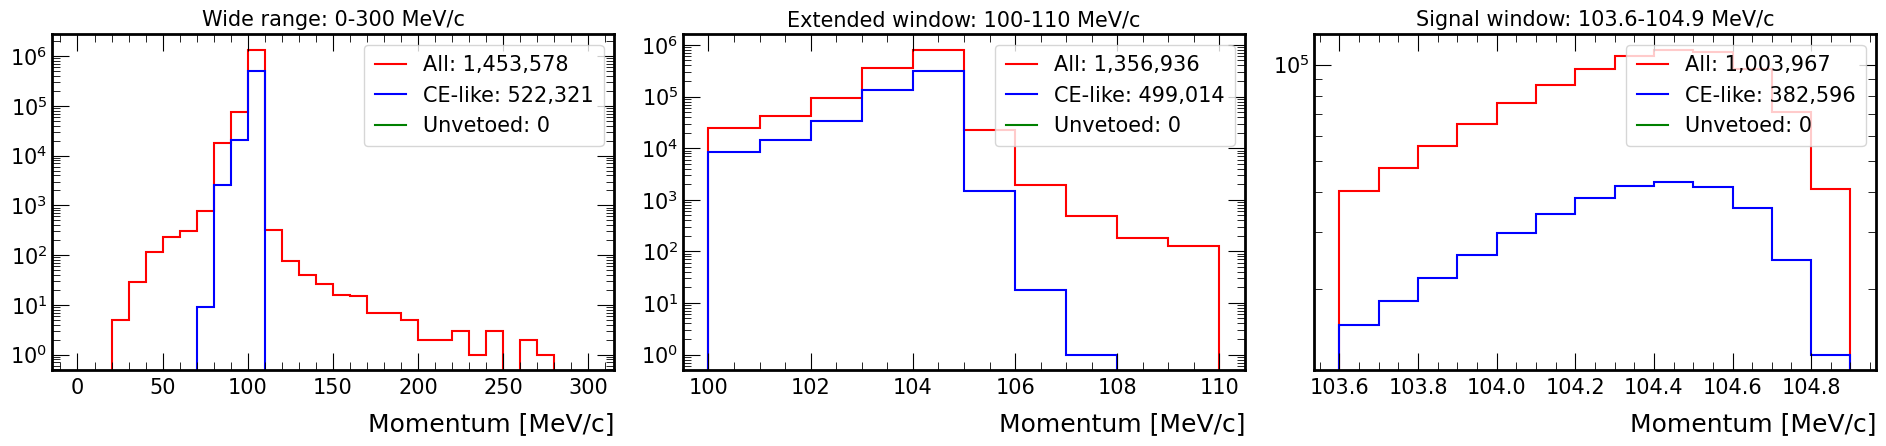

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/alpha_signal_onspill-LH_an/h1o_crv_zwindows.png


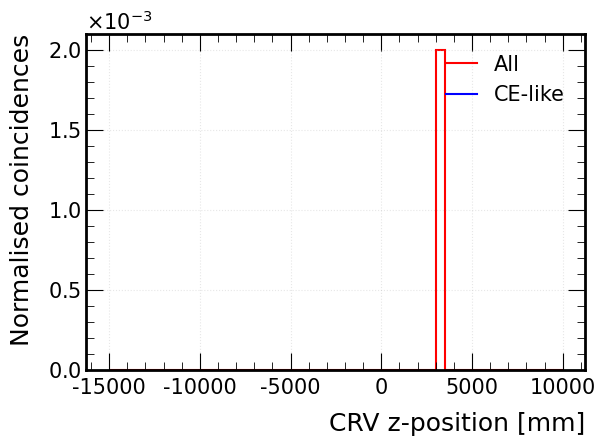

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

### Efficiency 

In [10]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),522321,4000000,13.06,0.02
1,Signal (ext),499014,4000000,12.48,0.02
2,Signal (sig),382596,4000000,9.56,0.01
3,Veto (wide),0,522321,100.00,0.00
4,Veto (ext),0,499014,100.00,0.00
5,Veto (sig),0,382596,100.00,0.00


### Background event info

In [11]:
print(results["event_info"])

None


In [12]:
if results["events"]:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))